In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 20.6 MB 1.3 MB/s 


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate, train_test_split
from scipy import stats
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection

In [ ]:
def run_exps(X_train, y_train, X_test, y_test):
  return preds

In [ ]:
results = []
names = []
scoring = {'r2_score': make_scorer(r2_score)}
#scoring = {'RMSE': make_scorer(mean_squared_error, greater_is_better = False, squared=False)}

In [ ]:
df  = pd.read_csv('TG.csv')
df

,Unnamed: 0,PID,smiles,meanTg,minTg,maxTg,medianTg
0,0,P034240,*CC(*)CNc1ccc([N+](=O)[O-])c(C(F)(F)F)c1,153.0,153.0,153.0,153.0
1,1,P034241,*CC(*)CNc1ccc([N+](=O)[O-])cc1[N+](=O)[O-],160.0,160.0,160.0,160.0
2,2,P034359,*CC1CC(*)C(OC(=O)CCCCCCCCCCOc2ccc(-c3ccc(C#N)c...,14.5,14.5,14.5,14.5
3,3,P034360,*CC1CC(*)C(OC(=O)CCCCCCCCCCOc2ccc(-c3ccc(C#N)c...,30.5,30.5,30.5,30.5
4,4,P034361,*CCC1CC(OC(=O)CCCCCCCCCCOc2ccc(-c3ccc(C#N)cc3)...,24.0,24.0,24.0,24.0
...,...,...,...,...,...,...,...
7440,7440,P522041,*CC(F)(F)C1(F)C(*)CC(O)(C(F)(F)F)C1(F)F,152.0,152.0,152.0,152.0
7441,7441,P522047,*CC(F)(F)C1(F)CC(CC(O)(C(F)(F)F)C(F)(F)F)CC1*,98.0,98.0,98.0,98.0
7442,7442,P522048,*CC(F)(F)C1(F)CC(C(O)(C(F)(F)F)C(F)(F)F)CC1*,118.0,118.0,118.0,118.0
7443,7443,P522055,*CC(*)(F)C(=O)OCC(Cl)(Cl)Cl,127.0,127.0,127.0,127.0


In [ ]:
label = df['meanTg'].values
smiles = df['smiles'].values


Text(0, 0.5, 'Instances')

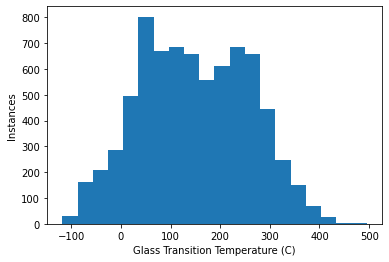

In [ ]:
plt.hist(label, 20)
plt.xlabel('Glass Transition Temperature (C)')
plt.ylabel('Instances')

In [ ]:
# feature engineering
fps = []
ys = []
for s,y in zip(smiles,label):
  try: 
    m = Chem.MolFromSmiles(s)
    fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=256)
  except:
    continue
  fps.append(fp)
  ys.append(y)
X = np.stack(fps, axis=0)
y = np.stack(ys, axis=0)
print(X.shape, y.shape)

RDKit WARNING: [02:02:12] WARNING: not removing hydrogen atom with dummy atom neighbors


(7445, 256) (7445,)


In [ ]:
def smiles_to_img(smiles):
  """ Converts smiles string to image

  Parameters:
  -----------
  smiles: string
    smiles string representing a molecule.

  Returns:
  --------
  None
  """

  m = Chem.MolFromSmiles(smiles)
  img = Draw.MolToImage(m)
  display(img)
  return None

In [ ]:
# model training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_mean = y_train.mean()
y_std = y_train.std()
y_train_t = (y_train - y_mean) / y_std
y_test_t = (y_test - y_mean) / y_std

(5956, 256) (1489, 256) (5956,) (1489,)


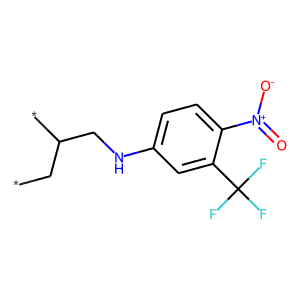

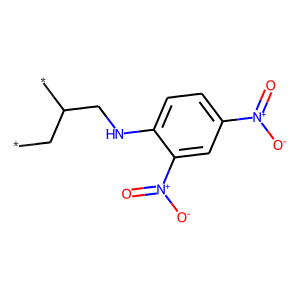

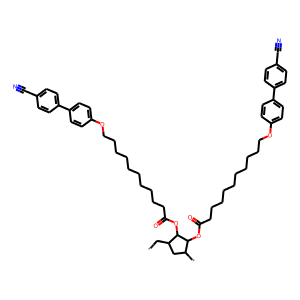

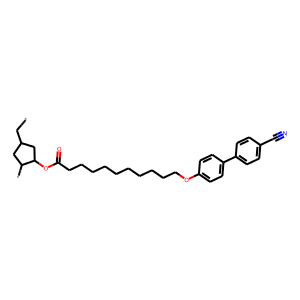

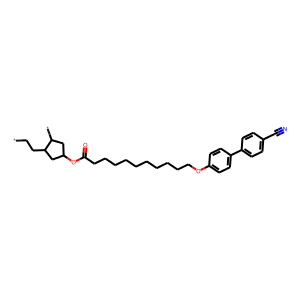

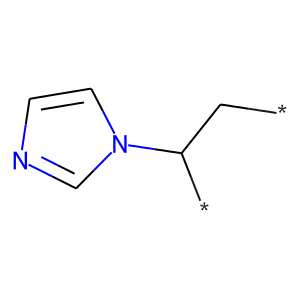

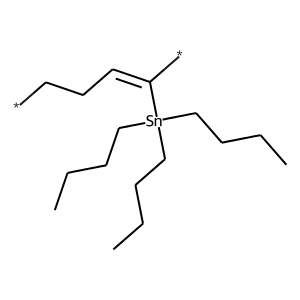

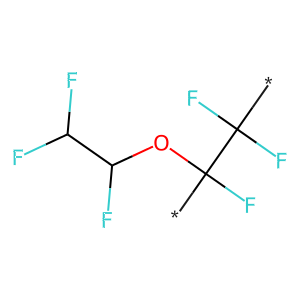

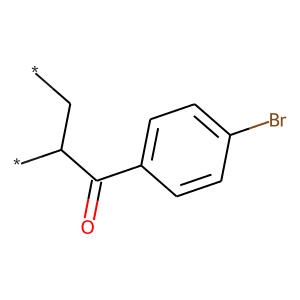

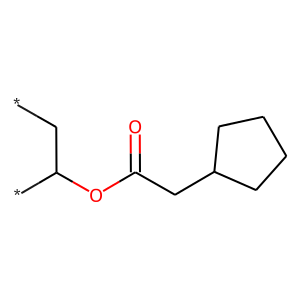

In [ ]:
smiles = df['smiles']
for i in range(10):
  smiles_to_img(smiles[i])

In [ ]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
#for name, model in models:
avg_r2s = []
avg_rmses = []
params = []

for n_estimators in [200, 400, 800]:
  for max_features in np.linspace(0.1,1,9):
    model_ = GradientBoostingRegressor(n_estimators=n_estimators, max_features=max_features)
    r2s = []
    rmses = []
    #cv_results = model_selection.cross_validate(model_, X_train, y_train_t, cv=kfold, scoring=scoring, return_train_score=True)
    for train_index, test_index in kfold.split(X_train):
      xtrain, ytrain = X_train[train_index], y_train_t[train_index]
      xvalid, yvalid = X_train[test_index], y_train_t[test_index]
      model_.fit(xtrain, ytrain)
      y_true = yvalid*y_std + y_mean
      y_pred = model_.predict(xvalid)*y_std + y_mean
      valid_rmse = mean_squared_error(y_true, y_pred, squared=False)
      valid_r2 = r2_score(y_true, y_pred)
      r2s.append(valid_r2)
      rmses.append(valid_rmse)
    avg_r2s.append(np.mean(r2s))
    avg_rmses.append(np.mean(rmses))
    params.append((n_estimators, max_features))

    print("Average R2: {} Average RMSE: {} Parameters: n_estimators: {} max_features: {}".format(avg_r2s[-1], avg_rmses[-1], *params[-1]))
    '''
    for score in ['train_r2_score', 'test_r2_score']:
      scores = cv_results[score]
      mean_scores = np.round(np.mean(scores), 4)
      stderr_scores = np.round(stats.sem(scores), 4)
      print("Train RMSE: {} Valid RMSE: {} n_estimators: {} max_features: {} {}: {} +/- {}".format(train_rmse, valid_rmse, n_estimators, max_features, score, mean_scores, stderr_scores))
    '''


Average R2: 0.796778024673958 Average RMSE: 49.59859950773129 Parameters: n_estimators: 200 max_features: 0.1


KeyboardInterrupt: ignored

In [ ]:
import tqdm
r2s = []
RMSEs = []
for r in tqdm.tqdm(range(100)):
  model = GradientBoostingRegressor(min_samples_split=13, min_weight_fraction_leaf=0.0035382950276538544, max_depth=8, max_features=0.5946665388805555,
                                  learning_rate=0.05, n_estimators=924, subsample=0.4159633516316278, random_state=r)
  model.fit(X_train, y_train_t)
  y_pred_t = model.predict(X_train)
  y_pred = y_std*y_pred_t + y_mean
  mae = mean_absolute_error(y_train, y_pred)
  r2 = r2_score(y_train, y_pred)
  RMSE = mean_squared_error(y_train, y_pred, squared=False)
  r2s.append(r2)
  RMSEs.append(RMSE)

  0%|          | 0/100 [00:10<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)

cv_results = model_selection.cross_validate(GradientBoostingRegressor(min_samples_split=13, min_weight_fraction_leaf=0.0035382950276538544,
                                                                      max_depth=8, max_features=0.5946665388805555, learning_rate=0.05,
                                                                      n_estimators=924, subsample=0.4159633516316278, random_state=90210),
                                             X_train, y_train_t, cv=kfold, scoring=scoring, return_train_score=True)


In [ ]:
for score in ['train_r2_score', 'test_r2_score']:
      scores = cv_results[score]
      mean_scores = np.round(np.mean(scores), 4)
      stderr_scores = np.round(stats.sem(scores), 4)
      print("{}: {} +/- {}".format(score, mean_scores, stderr_scores))

Train R2: train_r2_score: 0.9853 +/- 0.0002
Train R2: test_r2_score: 0.8848 +/- 0.0044


In [ ]:

model = GradientBoostingRegressor(min_samples_split=13, min_weight_fraction_leaf=0.0035382950276538544, max_depth=8, max_features=0.5946665388805555,
                                  learning_rate=0.05, n_estimators=924, subsample=0.4159633516316278, random_state=90210)
model.fit(X_train, y_train_t)
y_pred_t = model.predict(X_test)
y_pred = y_std*y_pred_t + y_mean
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: {} R2: {}".format(RMSE, r2))

RMSE: 35.74464626888003 R2: 0.8937298477590481


In [ ]:
r2_mean = np.mean(r2s)
RMSE_mean = np.mean(RMSEs)

print("RMSE: {} R2: {}".format(RMSE_mean, r2_mean))

NameError: ignored

In [ ]:
model = GradientBoostingRegressor(min_samples_split=13, min_weight_fraction_leaf=0.0035382950276538544, max_depth=8, max_features=0.5946665388805555,
                                  learning_rate=0.05, n_estimators=924, subsample=0.4159633516316278, random_state=90210)

model.fit(X_train, y_train_t)
y_pred_train = model.predict(X_train)*y_std + y_mean
y_pred_test = model.predict(X_test)*y_std + y_mean
print("train_r2:", r2_score(y_train, y_pred_train), "train mae:", mean_absolute_error(y_train, y_pred_train))
print("test_r2:", r2_score(y_test, y_pred_test), "test mae:", mean_absolute_error(y_test, y_pred_test))

train_r2: 0.9816535752124317 train mae: 10.209129240607172
test_r2: 0.8869574850599827 test mae: 24.86068607238054


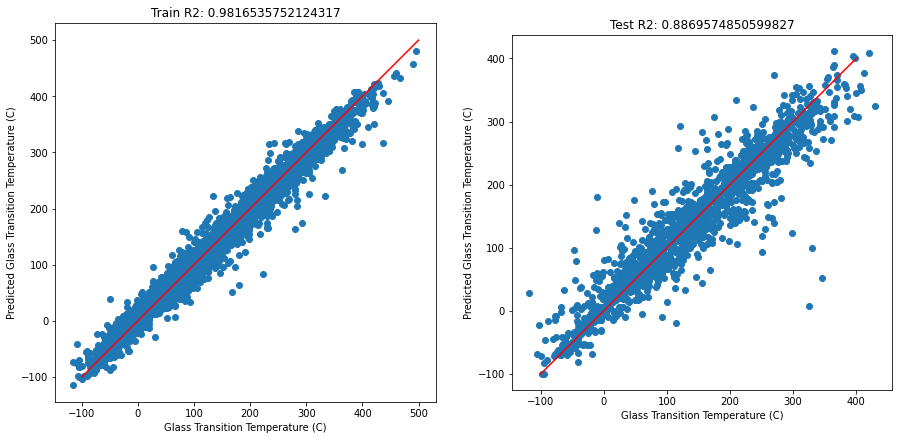

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))
ax[0].scatter(y_train, y_pred_train)
ax[0].plot(np.linspace(-100, 500), np.linspace(-100, 500), 'r')
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_xlabel("Glass Transition Temperature (C)")
ax[0].set_ylabel("Predicted Glass Transition Temperature (C)")
ax[0].set_title("Train R2: {}".format(r2_score(y_train, y_pred_train)))
ax[1].scatter(y_test, y_pred_test)
ax[1].plot(np.linspace(-100, 400), np.linspace(-100, 400), 'r')
ax[1].set_aspect('equal', adjustable='box')
ax[1].set_xlabel("Glass Transition Temperature (C)")
ax[1].set_ylabel("Predicted Glass Transition Temperature (C)")
ax[1].set_title("Test R2: {}".format(r2_score(y_test, y_pred_test)))
plt.show()
plt.close()

In [ ]:
model = GradientBoostingRegressor(n_estimators=800, max_features=0.1)

model.fit(X_train, y_train_t)
y_pred_train = model.predict(X_train)*y_std + y_mean
y_pred_test = model.predict(X_test)*y_std + y_mean
print("train_r2:", r2_score(y_train, y_pred_train), "train mae:", mean_absolute_error(y_train, y_pred_train))
print("test_r2:", r2_score(y_test, y_pred_test), "test mae:", mean_absolute_error(y_test, y_pred_test))

train_r2: 0.9107038922947542 train mae: 24.28091319490143
test_r2: 0.853224079256344 test mae: 31.38417289806795
